In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms
%matplotlib inline

In [14]:
image = torch.tensor([
  [10, 10, 10, 0, 0, 0], 
  [10, 10, 10, 0, 0, 0], 
  [10, 10, 10, 0, 0, 0], 
  [10, 10, 10, 0, 0, 0], 
  [10, 10, 10, 0, 0, 0], 
  [10, 10, 10, 0, 0, 0], 
])

filter = torch.tensor([
  [1, 0, -1],
  [1, 0, -1],
  [1, 0, -1]  
])

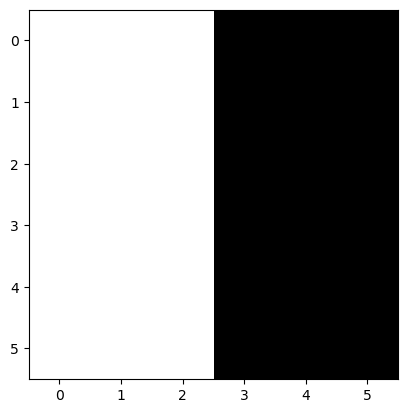

In [6]:
plt.imshow(image, cmap='gray')

In [39]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    print('apply_kernel: ri, ci, rk, ck, ro, co:', ri, ci, rk, ck, ro, co)
    for i in range(ro): 
        for j in range(co):            
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [40]:
output = apply_kernel(image, filter)
output

apply_kernel: ri, ci, rk, ck, ro, co: 6 6 3 3 4 4


tensor([[ 0., 30., 30.,  0.],
        [ 0., 30., 30.,  0.],
        [ 0., 30., 30.,  0.],
        [ 0., 30., 30.,  0.]])

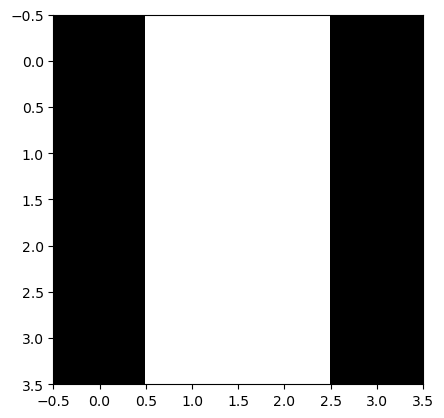

In [41]:
plt.imshow(output, cmap='gray')

In [42]:
image = torch.tensor([
  [10, 10, 10, 10, 10, 10], 
  [10, 10, 10, 10, 10, 10], 
  [10, 10, 10, 10, 10, 10], 
  [0, 0, 0, 0, 0, 0], 
  [0, 0, 0, 0, 0, 0], 
  [0, 0, 0, 0, 0, 0], 
])

filter = torch.tensor([
  [1, 1, 1],
  [0, 0, 0],
  [-1, -1, -1]  
])

In [43]:
output = apply_kernel(image, filter)
output

apply_kernel: ri, ci, rk, ck, ro, co: 6 6 3 3 4 4


tensor([[ 0.,  0.,  0.,  0.],
        [30., 30., 30., 30.],
        [30., 30., 30., 30.],
        [ 0.,  0.,  0.,  0.]])

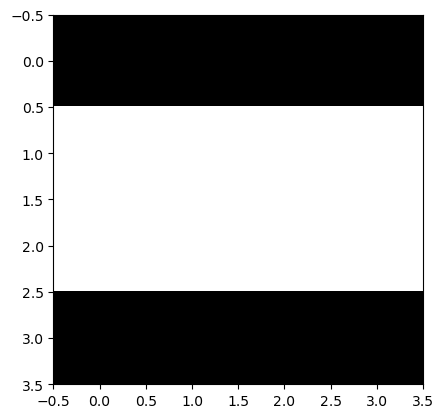

In [44]:
plt.imshow(output, cmap='gray')

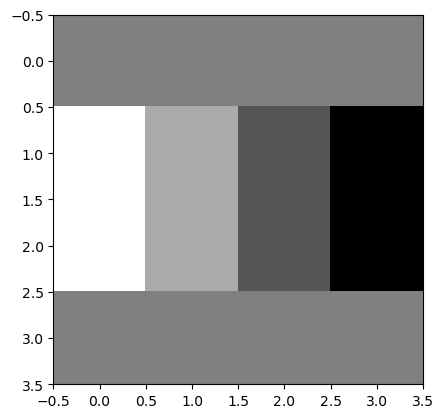

In [45]:
image = torch.tensor([      
  [0, 0, 0, 0], 
  [30, 10, -10, -30], 
  [30, 10, -10, -30], 
  [0, 0, 0, 0]
])
plt.imshow(image, cmap='gray')